In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Some initial pandas setup
pd.set_option('display.precision',3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 25)

In [2]:
import mysql.connector as db

In [5]:
con = db.connect(host='localhost',user='ax07998',password='Abcd1234.',database='hu_monitor')

In [6]:
df = pd.read_sql('SELECT * FROM hu_monitor.kicsomdata',con)
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8349 entries, 0 to 8348
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   recid          8349 non-null   int64          
 1   kezdAx         8349 non-null   object         
 2   vegezAX        8349 non-null   object         
 3   kicsAllapot    8349 non-null   object         
 4   huid3          8349 non-null   object         
 5   kicsomKezdDat  8349 non-null   datetime64[ns] 
 6   kicsomVegDat   8349 non-null   datetime64[ns] 
 7   idotartam      8349 non-null   timedelta64[ns]
 8   sorok          8349 non-null   int64          
 9   totveight      8349 non-null   float64        
 10  totvol         8349 non-null   float64        
 11  totDara        8349 non-null   int64          
 12  tevid          8349 non-null   int64          
dtypes: datetime64[ns](2), float64(2), int64(4), object(4), timedelta64[ns](1)
memory usage: 848.1+ KB


,recid,idotartam,sorok,totveight,totvol,totDara,tevid
count,8349.000,8349,8349.000,8349.000,8.349e+03,8349.000,8349.000
mean,6124.595,0 days 00:16:37.903581,14.290,59.467,5.794e+05,111.226,35.571
std,4567.025,0 days 05:34:04.199649,23.561,109.325,7.971e+05,347.122,18.294
min,1.000,-1 days +06:50:16,1.000,0.000,0.000e+00,1.000,-1.000
25%,2088.000,0 days 00:00:38,2.000,7.886,6.293e+04,5.000,35.000
50%,4175.000,0 days 00:04:46,7.000,26.700,2.310e+05,24.000,35.000
75%,10724.000,0 days 00:12:39,18.000,72.150,8.456e+05,81.000,36.000
max,13714.000,17 days 07:05:55,600.000,4738.921,9.296e+06,9443.000,999.000


## Lets see, what the describe() function shows us

We have 8349 records<br>
We do not need recid, and tevid, we should drop them<br>
We have kind of strange times:<br>
<ul>
    <li>-1 day 6 hours</li>
    <li>We got 17 days and 7 hours</li>
</ul>
We should chnage volume from CCM to CD3 at least
We should convert the datetime (idotartam) to number of minutes, to be able calculate line/hour
We should make consistent casing for user ids


In [ ]:
df.head()

In [7]:
df1 = df.drop(['recid','tevid'],axis='columns')
df1.index.name='index'
df1.head()

,kezdAx,vegezAX,kicsAllapot,huid3,kicsomKezdDat,kicsomVegDat,idotartam,sorok,totveight,totvol,totDara
index,,,,,,,,,,,
0,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE436,2020-04-24 12:27:16,2020-04-24 12:11:34,00:15:42,31,82.007,1.656e+06,70
1,a141001,a141001,KICSOM VÉGE KISANY URGENT,119384,2020-04-24 12:57:49,2020-04-24 12:28:30,00:29:19,51,57.239,2.222e+05,146
2,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE391,2020-04-24 13:13:24,2020-04-24 13:00:52,00:12:32,16,42.188,2.340e+05,28
3,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE397,2020-04-24 13:25:35,2020-04-24 13:13:31,00:12:04,14,53.676,2.977e+05,18
4,a141001,a141001,KICSOM VÉGE KISANY URGENT,119848,2020-04-24 14:00:13,2020-04-24 13:27:37,00:32:36,72,28.120,9.613e+04,264


In [8]:
# Lets see the negative times
df1[df1['idotartam'] < pd.Timedelta(0)]
# It seems, that the deleted state records can be deleted
df1[df1['kicsAllapot'].str.contains('TÖRÖL')]
# Ok, now we can delete all the items which are DELETED
# To do this we need to find the correct selector for the problematic rows,
# and negate the selector with "~"
df2 = df1[~df1['kicsAllapot'].str.contains('TÖRÖL')]
df2.head()

,kezdAx,vegezAX,kicsAllapot,huid3,kicsomKezdDat,kicsomVegDat,idotartam,sorok,totveight,totvol,totDara
index,,,,,,,,,,,
0,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE436,2020-04-24 12:27:16,2020-04-24 12:11:34,00:15:42,31,82.007,1.656e+06,70
1,a141001,a141001,KICSOM VÉGE KISANY URGENT,119384,2020-04-24 12:57:49,2020-04-24 12:28:30,00:29:19,51,57.239,2.222e+05,146
2,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE391,2020-04-24 13:13:24,2020-04-24 13:00:52,00:12:32,16,42.188,2.340e+05,28
3,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE397,2020-04-24 13:25:35,2020-04-24 13:13:31,00:12:04,14,53.676,2.977e+05,18
4,a141001,a141001,KICSOM VÉGE KISANY URGENT,119848,2020-04-24 14:00:13,2020-04-24 13:27:37,00:32:36,72,28.120,9.613e+04,264


In [9]:
# Lets see the mixed case of the ipns...
df2[df2['kezdAx'].str.startswith('A')]
# We need to have same casing for ipns, so convert them all to lowercase
df2['kezdAx'] = df2['kezdAx'].str.lower()
df2['vegezAX'] = df2['vegezAX'].str.lower()
# Lets see the result, we should have none :).
df2[df2['kezdAx'].str.startswith('A')]

<ipython-input-9-25165c864807>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['kezdAx'] = df2['kezdAx'].str.lower()
<ipython-input-9-25165c864807>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['vegezAX'] = df2['vegezAX'].str.lower()


,kezdAx,vegezAX,kicsAllapot,huid3,kicsomKezdDat,kicsomVegDat,idotartam,sorok,totveight,totvol,totDara
index,,,,,,,,,,,


In [10]:
dfTmp = df2.groupby(['vegezAX','kicsAllapot'])['sorok'].sum().reset_index()
# plt.plot(dfTmp['vegezAX'],dfTmp['sorok'])
# plt.xticks(rotation=45)
# plt.show()

In [11]:
# Now lets check the unpack which was longer than 4 hours:
df3 = df2[~ ((df2['idotartam'] > pd.Timedelta('0 day 4 hour')) & (df2['kezdAx'] == 'ax07057'))]

In [12]:
df3[df3['idotartam'] > pd.Timedelta('0 day 4 hour')]

,kezdAx,vegezAX,kicsAllapot,huid3,kicsomKezdDat,kicsomVegDat,idotartam,sorok,totveight,totvol,totDara
index,,,,,,,,,,,
559,ax07224,ax07224,KICSOM VÉGE KISANYAG STOCK,128596,2020-05-15 12:18:46,2020-05-15 07:52:09,04:26:37,509,80.170,3.227e+05,1094
671,ax07224,ax07224,KICSOM VÉGE KISANYAG STOCK,167477,2020-06-22 13:19:11,2020-06-22 07:55:36,05:23:35,226,101.546,5.013e+05,613
710,ax07224,ax07224,KICSOM VÉGE KISANYAG STOCK,187737,2020-07-09 14:33:41,2020-07-09 09:32:49,05:00:52,562,189.253,1.010e+06,6744
1119,ax19660,ax07224,KICSOM VÉGE KISANYAG STOCK,128614,2020-05-15 20:30:29,2020-05-15 13:25:30,07:04:59,600,181.243,1.096e+06,4218
4708,v009411,v009411,KICSOM VÉGE KISANYAG STOCK,199971,2020-07-20 13:25:13,2020-07-20 08:14:13,05:11:00,427,143.272,5.926e+05,2171


In [13]:
# Lets convert idotartam to minutes
df3['percek'] = df3['idotartam'].dt.total_seconds()/60

<ipython-input-13-3492184fc4a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['percek'] = df3['idotartam'].dt.total_seconds()/60


In [58]:
df3.head()

,kezdAx,vegezAX,kicsAllapot,huid3,kicsomKezdDat,kicsomVegDat,idotartam,sorok,totveight,totvol,totDara,percek
index,,,,,,,,,,,,
0,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE436,2020-04-24 12:27:16,2020-04-24 12:11:34,00:15:42,31,82.007,1.656e+06,70,15.700
1,a141001,a141001,KICSOM VÉGE KISANY URGENT,119384,2020-04-24 12:57:49,2020-04-24 12:28:30,00:29:19,51,57.239,2.222e+05,146,29.317
2,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE391,2020-04-24 13:13:24,2020-04-24 13:00:52,00:12:32,16,42.188,2.340e+05,28,12.533
3,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE397,2020-04-24 13:25:35,2020-04-24 13:13:31,00:12:04,14,53.676,2.977e+05,18,12.067
4,a141001,a141001,KICSOM VÉGE KISANY URGENT,119848,2020-04-24 14:00:13,2020-04-24 13:27:37,00:32:36,72,28.120,9.613e+04,264,32.600


In [14]:
df3['sor_per_ora'] = df3['sorok']/(df3['percek']/60)

<ipython-input-14-a61cbbdd3fd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sor_per_ora'] = df3['sorok']/(df3['percek']/60)


In [15]:
df3.head()

,kezdAx,vegezAX,kicsAllapot,huid3,kicsomKezdDat,kicsomVegDat,idotartam,sorok,totveight,totvol,totDara,percek,sor_per_ora
index,,,,,,,,,,,,,
0,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE436,2020-04-24 12:27:16,2020-04-24 12:11:34,00:15:42,31,82.007,1.656e+06,70,15.700,118.471
1,a141001,a141001,KICSOM VÉGE KISANY URGENT,119384,2020-04-24 12:57:49,2020-04-24 12:28:30,00:29:19,51,57.239,2.222e+05,146,29.317,104.377
2,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE391,2020-04-24 13:13:24,2020-04-24 13:00:52,00:12:32,16,42.188,2.340e+05,28,12.533,76.596
3,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE397,2020-04-24 13:25:35,2020-04-24 13:13:31,00:12:04,14,53.676,2.977e+05,18,12.067,69.613
4,a141001,a141001,KICSOM VÉGE KISANY URGENT,119848,2020-04-24 14:00:13,2020-04-24 13:27:37,00:32:36,72,28.120,9.613e+04,264,32.600,132.515


In [61]:
df3['totvol'] = df3['totvol'] / 1000

<ipython-input-61-b9de874df9ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['totvol'] = df3['totvol'] / 1000


In [16]:
df3.head()

,kezdAx,vegezAX,kicsAllapot,huid3,kicsomKezdDat,kicsomVegDat,idotartam,sorok,totveight,totvol,totDara,percek,sor_per_ora
index,,,,,,,,,,,,,
0,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE436,2020-04-24 12:27:16,2020-04-24 12:11:34,00:15:42,31,82.007,1.656e+06,70,15.700,118.471
1,a141001,a141001,KICSOM VÉGE KISANY URGENT,119384,2020-04-24 12:57:49,2020-04-24 12:28:30,00:29:19,51,57.239,2.222e+05,146,29.317,104.377
2,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE391,2020-04-24 13:13:24,2020-04-24 13:00:52,00:12:32,16,42.188,2.340e+05,28,12.533,76.596
3,a141001,a141001,KICSOM VÉGE KISANY URGENT,LEE397,2020-04-24 13:25:35,2020-04-24 13:13:31,00:12:04,14,53.676,2.977e+05,18,12.067,69.613
4,a141001,a141001,KICSOM VÉGE KISANY URGENT,119848,2020-04-24 14:00:13,2020-04-24 13:27:37,00:32:36,72,28.120,9.613e+04,264,32.600,132.515


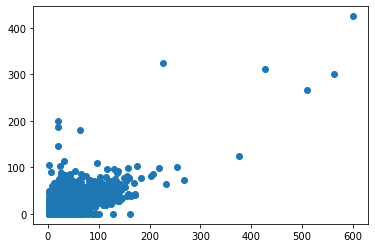

In [17]:
plt.scatter(df3['sorok'],df3['percek'])